In [140]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

## Load dataset
**1. [1 Point] Download the dataset from elearn and then load it to your notebook.**

In [141]:
df = pd.read_csv('Rice_Cammeo_Osmancik.csv')
df.head()

,ID,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,1,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,Cammeo
1,2,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,Cammeo
2,3,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,Cammeo
3,4,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,Cammeo
4,5,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,Cammeo


## Descriptive Analysis and Data Pre-processing
**2. [1 Point] Utilize appropriate functions from suitable libraries to determine if the dataset is balanced?**

Class Distribution:
Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64


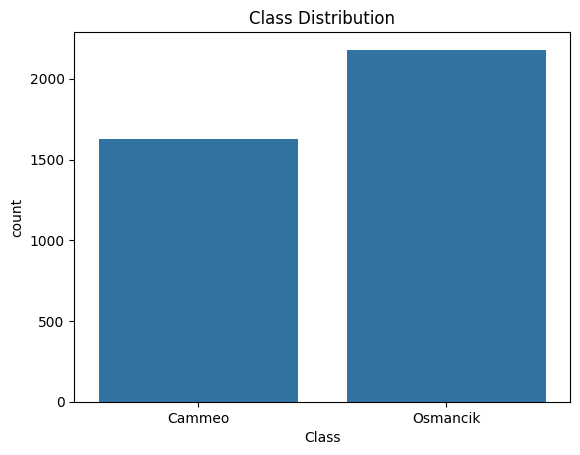

In [142]:
class_counts = df['Class'].value_counts()

print("Class Distribution:")
print(class_counts)

sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.show()

**3.	[1 Point] Show the information about the dataset including the total number of observations, the total number of attributes and the type of each attribute in this dataset**

In [143]:
print("Dataset Information:")
df.info()

print("\nTotal Observations:", df.shape[0])
print("Total Attributes:", df.shape[1])

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 3810 non-null   int64  
 1   Area               3809 non-null   float64
 2   Perimeter          3808 non-null   float64
 3   Major_Axis_Length  3809 non-null   float64
 4   Minor_Axis_Length  3808 non-null   float64
 5   Eccentricity       3808 non-null   float64
 6   Convex_Area        3809 non-null   float64
 7   Extent             3810 non-null   float64
 8   Class              3810 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 268.0+ KB

Total Observations: 3810
Total Attributes: 9


**4.	[1 Point] For feature selection drop any unusable feature from the dataframe**

In [144]:
df.drop('ID', axis=1, inplace=True)

**5.	[1 Point] a) Display a count of missing observations in each attribute. b) Remove the observations with missing values.**

In [145]:
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

df.dropna(inplace=True)

print("\nMissing Values After Dropping Rows:\n", df.isnull().sum())

Missing Values in Each Column:
 Area                 1
Perimeter            2
Major_Axis_Length    1
Minor_Axis_Length    2
Eccentricity         2
Convex_Area          1
Extent               0
Class                0
dtype: int64

Missing Values After Dropping Rows:
 Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64


**6.	[1 Point] Create a list that holds the numeric attributes columns’ names.**

In [146]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Numeric Columns:", numeric_columns)

Numeric Columns: ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Convex_Area', 'Extent']


**7.	[2 Point] Utilize the appropriate function to Show the five-number summary for all numeric attributes**

In [147]:
df[numeric_columns].describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000
mean,12666.944751,454.224257,188.774025,86.309194,0.886881,12951.563273,0.661917
std,1732.606672,35.595402,17.446952,5.733743,0.020819,1777.147195,0.077252
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11372.000000,426.165008,174.358124,82.721268,0.872438,11627.000000,0.598778
50%,12419.000000,448.846008,185.801941,86.428650,0.889033,12705.000000,0.645370
75%,13950.000000,483.657989,203.523453,90.133011,0.902622,14280.000000,0.726608
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


**8.	 [6 Points] a) Show the correlation table. b) Use appropriate plots to show the relationship between every two numeric columns in the dataset, with each data point coloured according to the class attribute. (Make sure plots have a title, xlabel and ylabel).**

Correlation Matrix:
                        Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  \
Area               1.000000   0.966453           0.902898           0.787943   
Perimeter          0.966453   1.000000           0.971865           0.629873   
Major_Axis_Length  0.902898   0.971865           1.000000           0.451995   
Minor_Axis_Length  0.787943   0.629873           0.451995           1.000000   
Eccentricity       0.351215   0.543913           0.710420          -0.292421   
Convex_Area        0.998948   0.969916           0.903267           0.787418   
Extent            -0.061449  -0.131078          -0.139899           0.063317   

                   Eccentricity  Convex_Area    Extent  
Area                   0.351215     0.998948 -0.061449  
Perimeter              0.543913     0.969916 -0.131078  
Major_Axis_Length      0.710420     0.903267 -0.139899  
Minor_Axis_Length     -0.292421     0.787418  0.063317  
Eccentricity           1.000000     0.351834 -0.19892

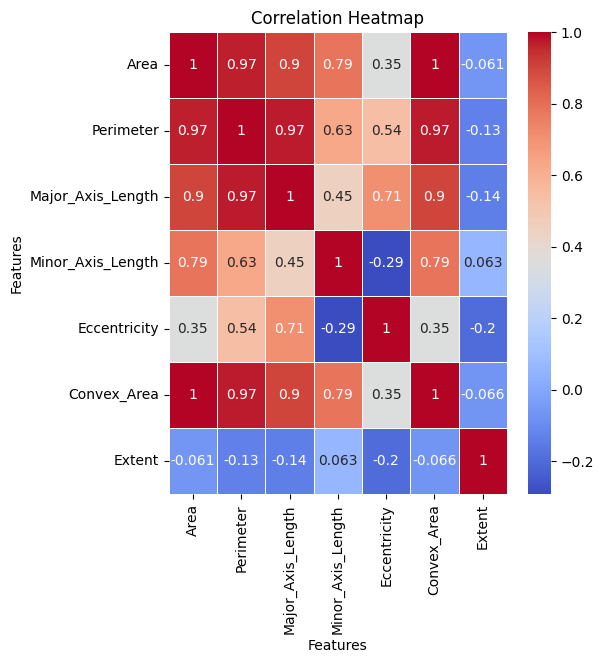

<Figure size 1400x1200 with 0 Axes>

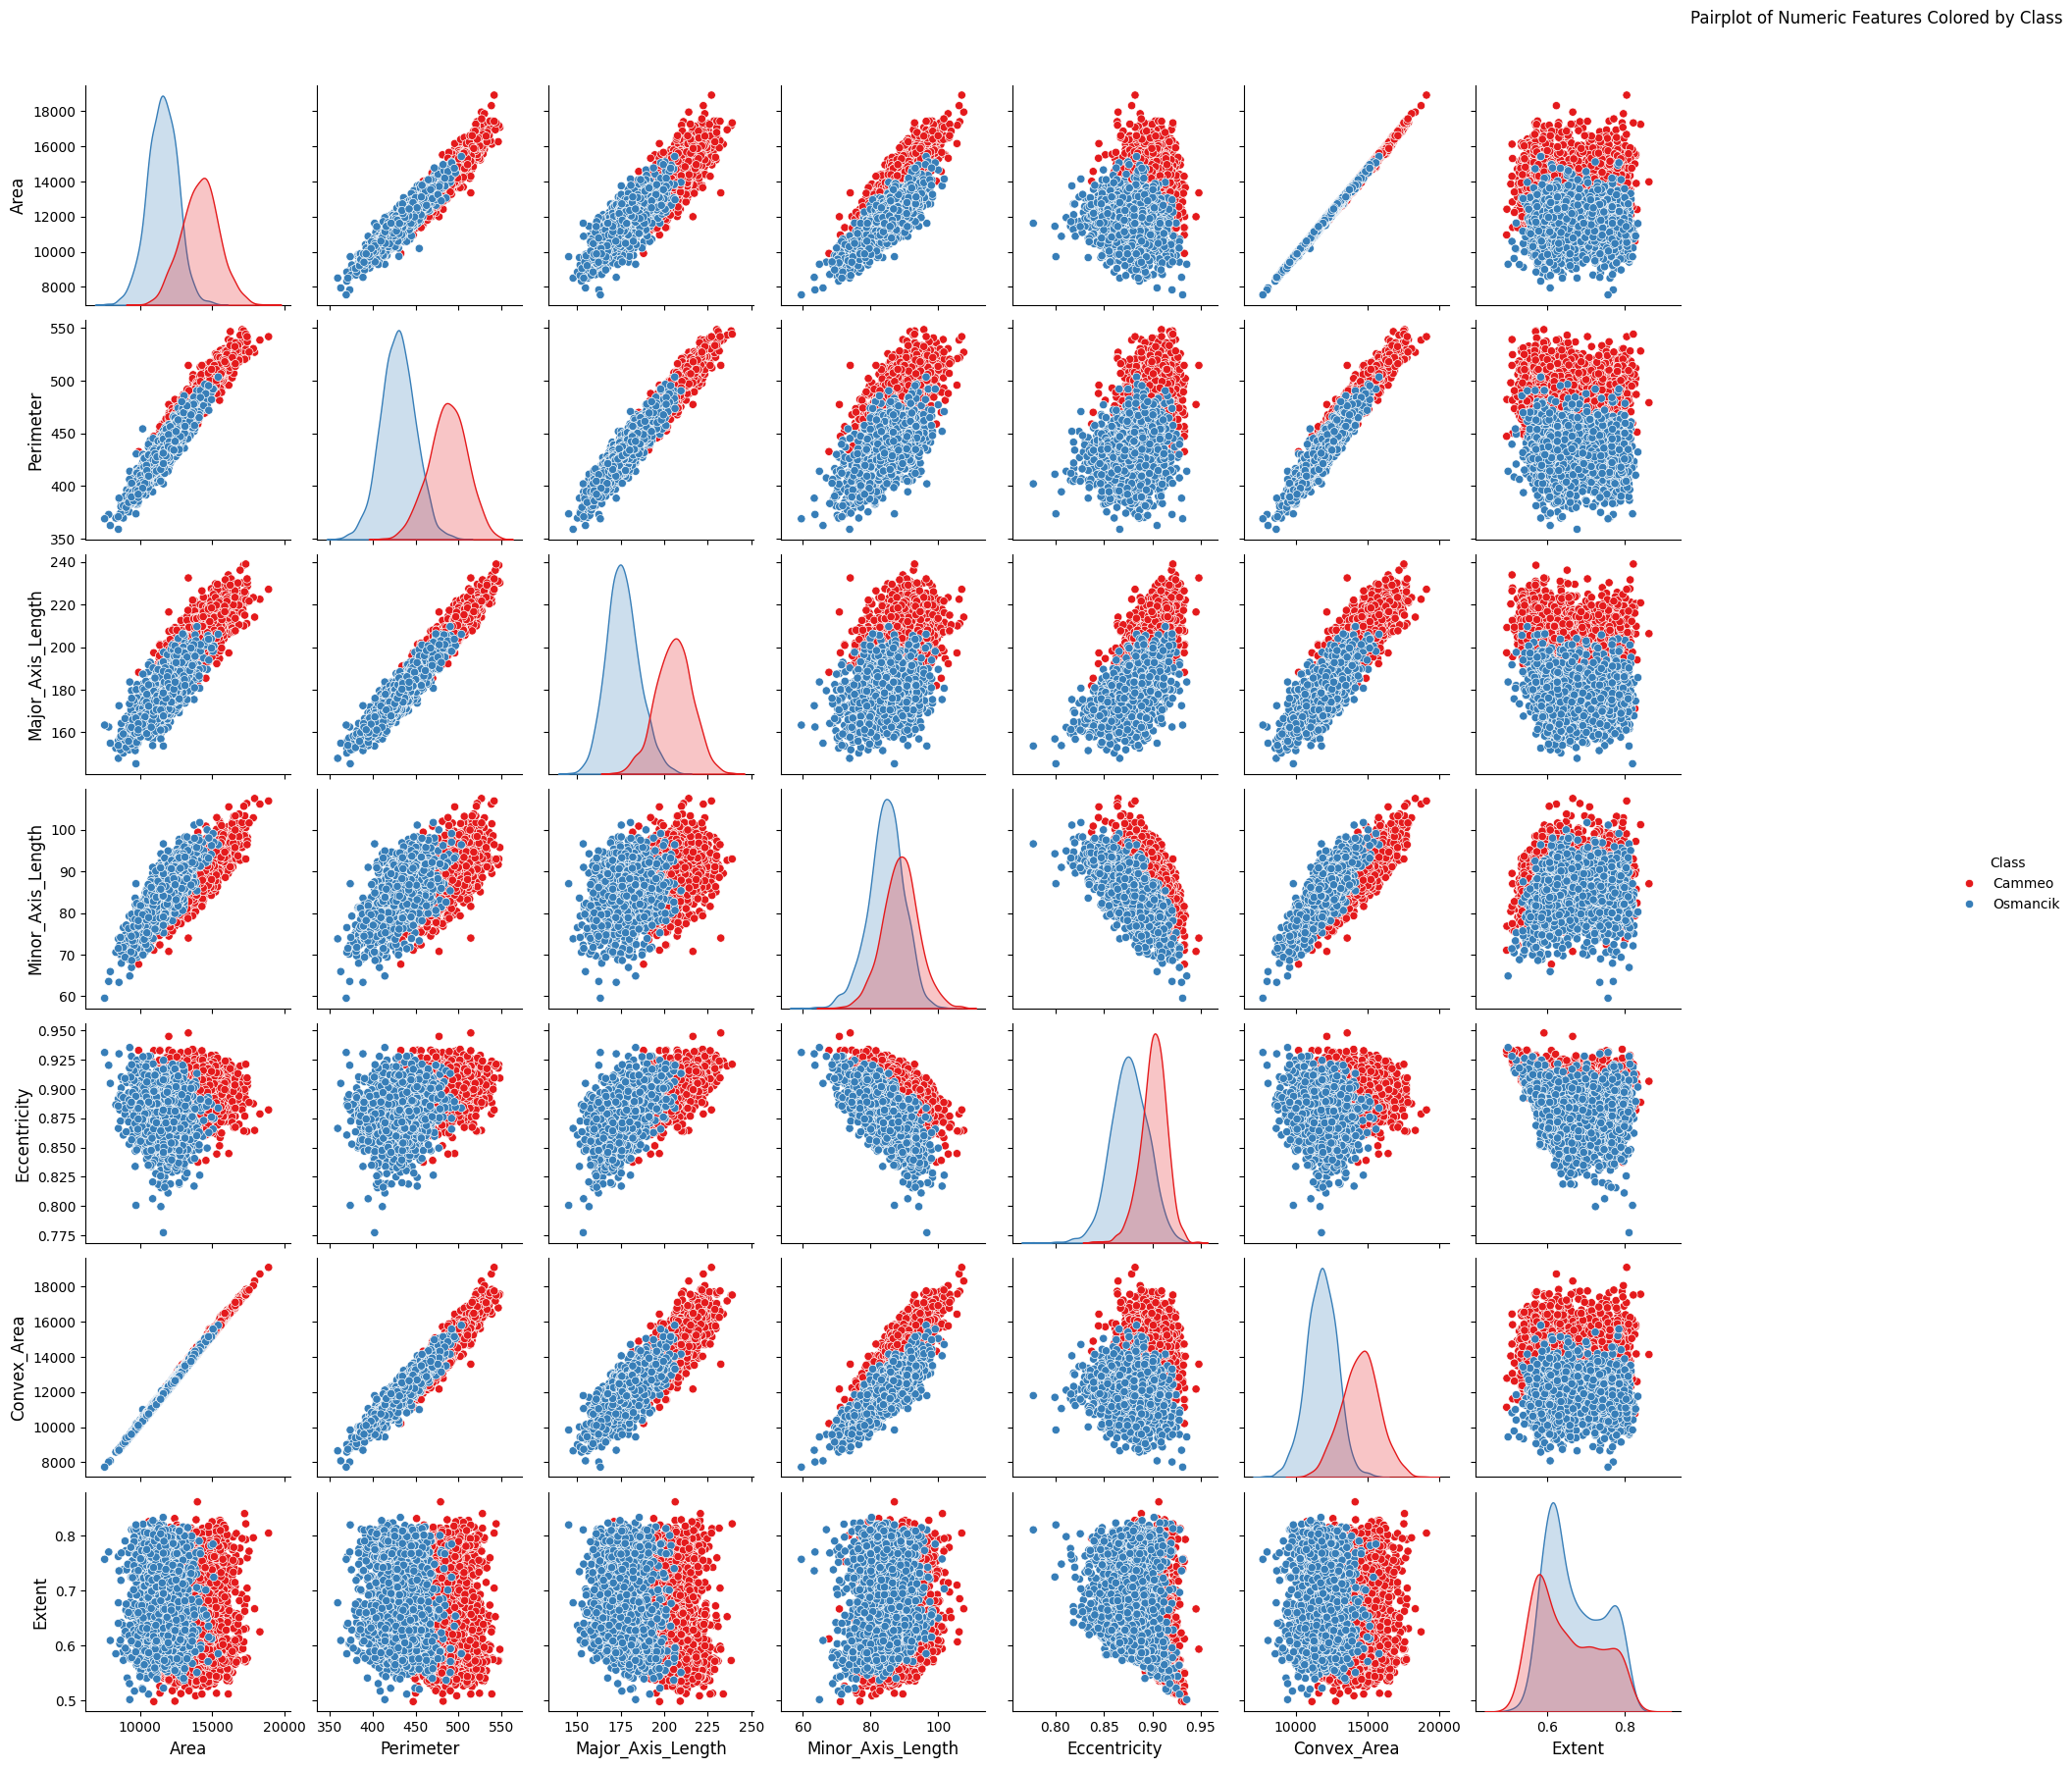

In [148]:
correlation_matrix = df[numeric_columns].corr()
print("Correlation Matrix:\n", correlation_matrix)

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
correlation_matrix = df[numeric_columns].corr()
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
heatmap.set_title("Correlation Heatmap")
heatmap.set_xlabel("Features")
heatmap.set_ylabel("Features")

plt.figure(figsize=(14, 12))
pairplot = sns.pairplot(df, hue='Class', palette='Set1')
pairplot.fig.suptitle("Pairplot of Numeric Features Colored by Class",x=1.03, y=1.03)

for ax in pairplot.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)
    # ax.set_title(f"{ax.get_ylabel()} vs {ax.get_xlabel()}", fontsize=10)

plt.show()

**9.	[2 Points] a) Show the distribution of the ‘Area’ for the ‘Cammeo’ class and the ‘Osmancik’ class separately. b) Point out the differences between the two histograms.**

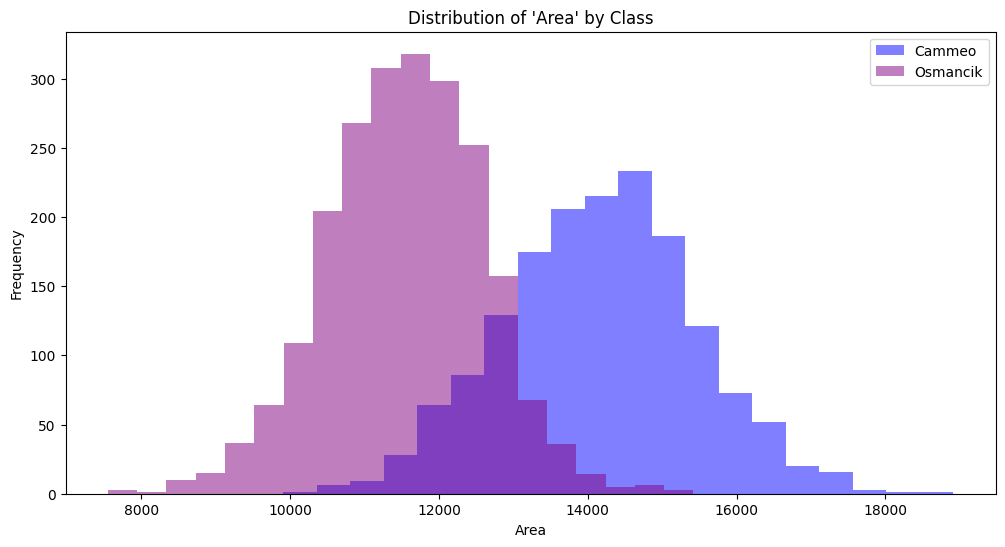

Cammeo grains are generally bigger and vary more in size, while Osmancik grains are smaller and more uniform.


In [149]:
plt.figure(figsize=(12, 6))
plt.hist(df[df['Class'] == 'Cammeo']['Area'], color='blue',bins=20, alpha=0.5, label='Cammeo')
plt.hist(df[df['Class'] == 'Osmancik']['Area'], color='purple',bins=20,alpha=0.5,  label='Osmancik')
plt.legend()
plt.title("Distribution of 'Area' by Class")
plt.xlabel("Area")
plt.ylabel("Frequency")
plt.show()

print('Cammeo grains are generally bigger and vary more in size, while Osmancik grains are smaller and more uniform.')

**10.	[6 Points] a) Use appropriate visualization to identify all attribute that has outliers and all the attributes with no outliers. b) Use an appropriate way to scale the data and redo the visualization**

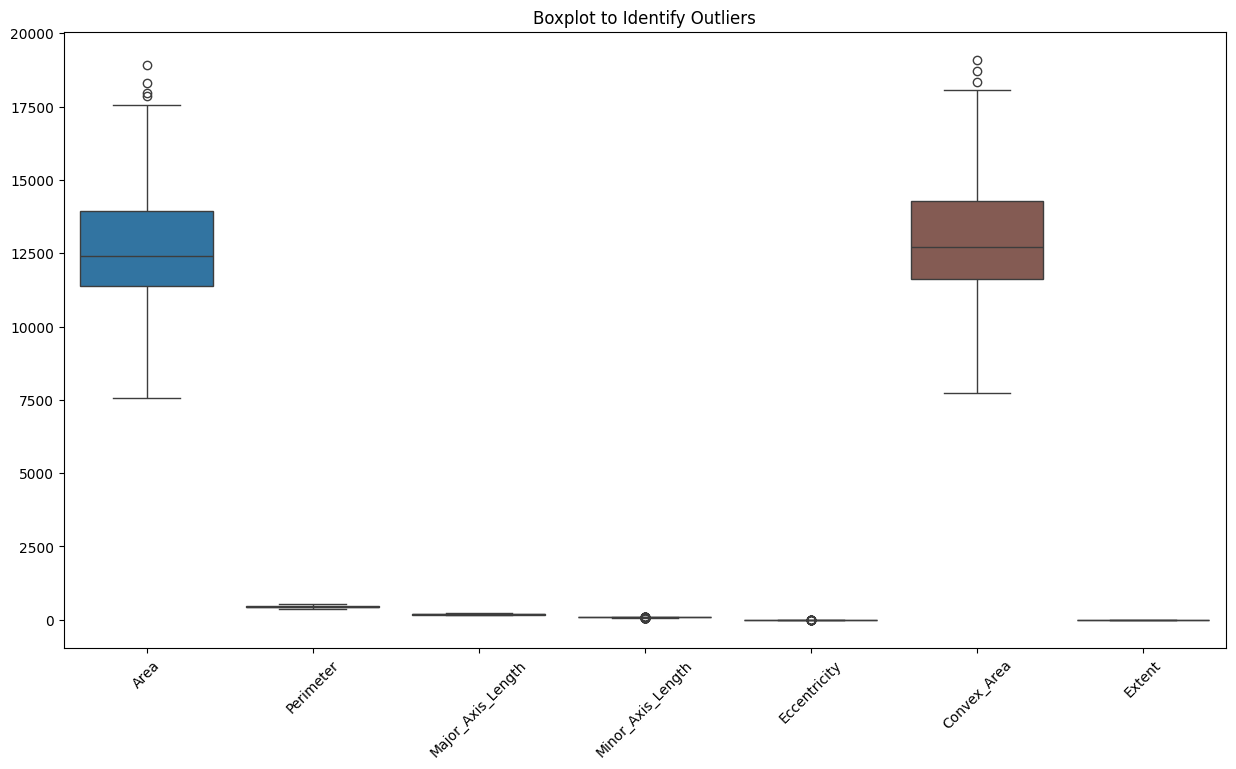

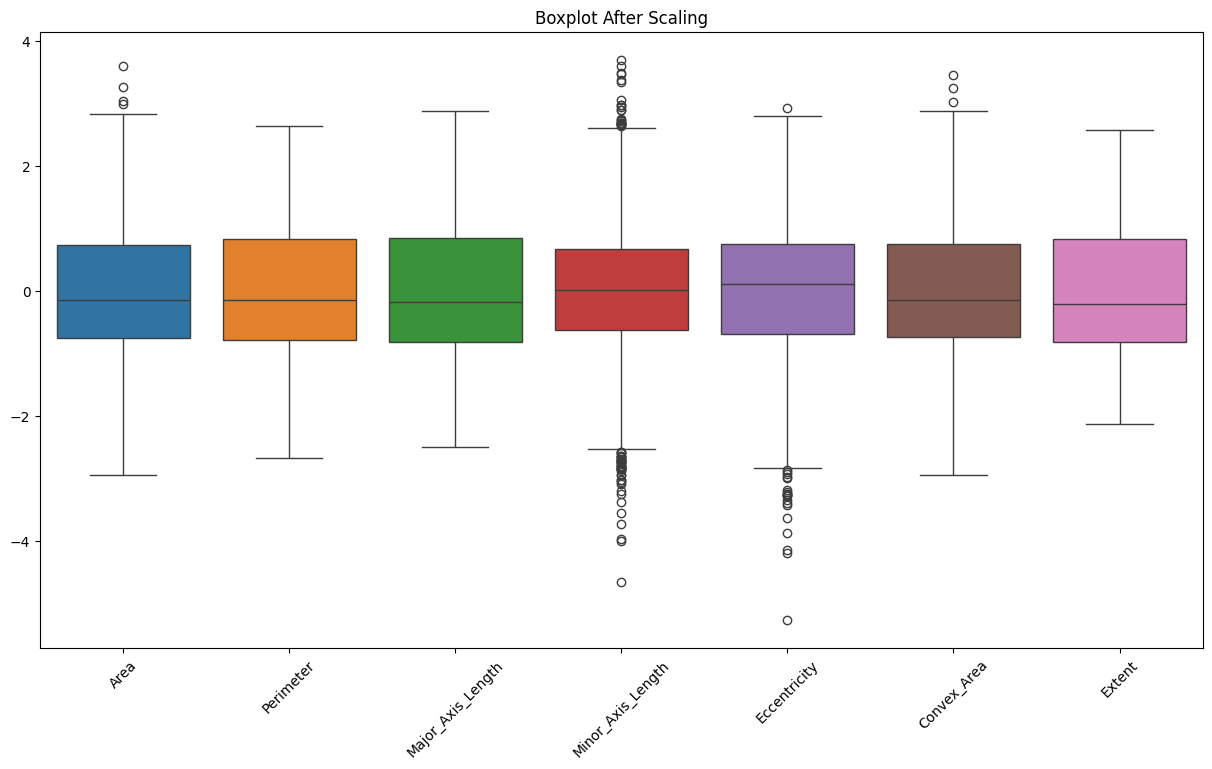

In [150]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=45)
plt.title("Boxplot to Identify Outliers")
plt.show()

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)

plt.figure(figsize=(15, 8))
sns.boxplot(data=df_scaled)
plt.xticks(rotation=45)
plt.title("Boxplot After Scaling")
plt.show()

**11.	[2 Points] Perform appropriate preprocessing techniques on the categorical attribute(s) in the dataset.**

In [151]:
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

## Multivariate Data Analysis (Classification)
**12.	[6 Points] Perform multivariate data analysis for classification using the following steps for the k nearest neighbor.**
* a.	Create feature (X) of the scaled data and target (y)
* b.	Split the dataset into a training set (70%) and testing set (30%), set random_state to 42. Each set (training and test) should contain approximately the same percentage of samples of each target class as the complete set. 
* c.	Run the Knn classifier with one neighbor 
* d.	Print a classification report.
* e.	Write a conclusion (in 2 sentences) summarizing the most important finding of this task.

In [152]:
X = df_scaled
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("KNN Classification Report:\n", classification_report(y_test, y_pred))

print('The KNN model with one neighbor provides decent accuracy, showing potential for rice grain classification.')


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       488
           1       0.90      0.90      0.90       653

    accuracy                           0.89      1141
   macro avg       0.89      0.89      0.89      1141
weighted avg       0.89      0.89      0.89      1141

The KNN model with one neighbor provides decent accuracy, showing potential for rice grain classification.


## BONUS 
**13.	[BONUS 10 Points] Grid Search is a method used to find optimal hyperparameters that result in the highest prediction accuracy for a model.**
* a.	Apply [Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classification on the sets you have prepared for the previous question. 
* b.	Apply [Grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best hyperparameter for the logistic regression model. 
* c.	Print a classification report of the best LR model
* d.	Compare the results of LR model and Knn model (in short)

In [153]:
# a) Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# b) Apply Grid Search for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_lr = grid_search.best_estimator_

# c) Print classification report for the best model
y_pred_best_lr = best_lr.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_best_lr))

# d) Comparison
print('Logistic Regression with optimized hyperparameters outperforms the KNN model, particularly in precision and recall.')


Best Parameters: {'C': 100, 'solver': 'lbfgs'}
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       488
           1       0.93      0.93      0.93       653

    accuracy                           0.92      1141
   macro avg       0.92      0.92      0.92      1141
weighted avg       0.92      0.92      0.92      1141

Logistic Regression with optimized hyperparameters outperforms the KNN model, particularly in precision and recall.
